In [1]:
# importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
# importing the dataset
df = pd.read_csv('Telecom_customer_churn1.csv')
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
# checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#checking the data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# checking the rows with spaces
df.loc[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
# replacing the spaces with numpy's nan
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [8]:
# now we can see some nul values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# dropping null rows
df.dropna(inplace=True)

In [10]:
# now lets change the type of the Total Charges column
df.TotalCharges = df.TotalCharges.astype('float64')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Exploratory Data Analysis

No     5163
Yes    1869
Name: Churn, dtype: int64


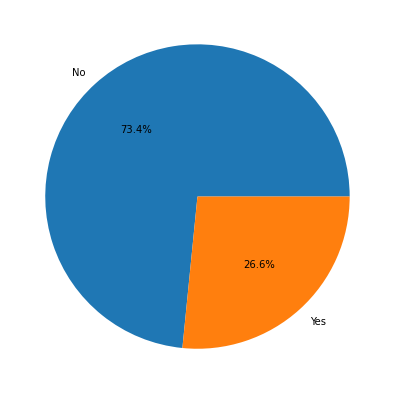

In [11]:
# Lets take a look at the target column
fig = plt.figure(figsize =(10, 7))
label = df['Churn'].value_counts().keys()
plt.pie(df['Churn'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['Churn'].value_counts())
plt.show()

<AxesSubplot:xlabel='Churn', ylabel='count'>

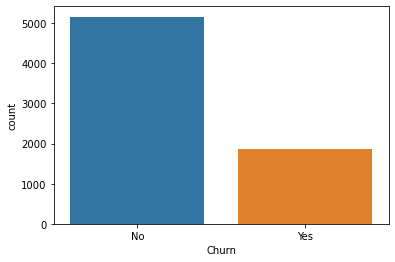

In [12]:
sns.countplot(df['Churn'])

Male      3549
Female    3483
Name: gender, dtype: int64


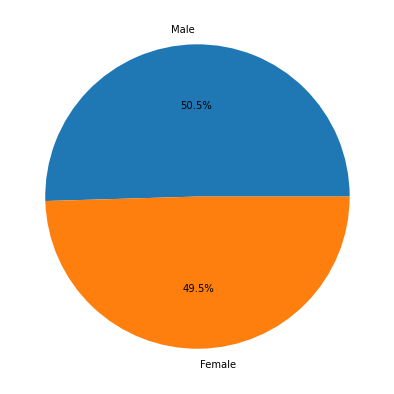

In [13]:
# Lets take a look at the gender column
fig = plt.figure(figsize =(10, 7))
label = df['gender'].value_counts().keys()
plt.pie(df['gender'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['gender'].value_counts())
plt.show()

In [14]:
# defining a function for plotting charts
def bar_chart(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

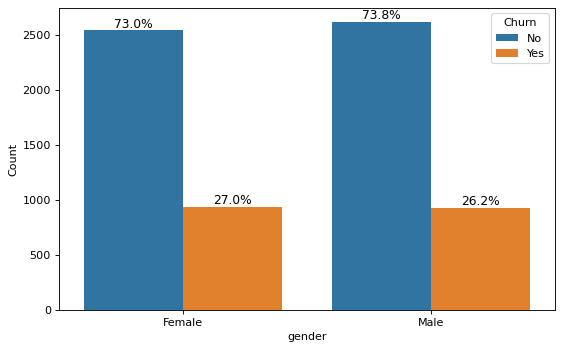

In [15]:
#let's see if gender affects Churn
plt.figure(figsize=(8,5), dpi=80)
gender = sns.countplot(x="gender", hue="Churn", data=df)
gender.set(xlabel='gender', ylabel='Count')

bar_chart(gender)
plt.show()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64


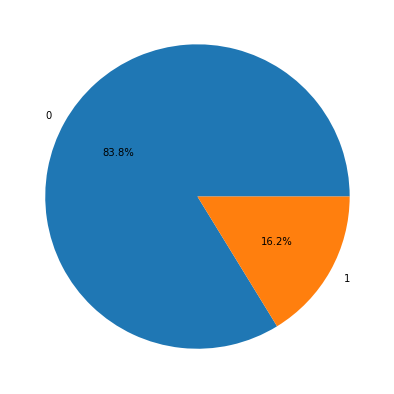

In [16]:
# let's take a look at Senior Citizen
fig = plt.figure(figsize =(10, 7))
label = df['SeniorCitizen'].value_counts().keys()
plt.pie(df['SeniorCitizen'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['SeniorCitizen'].value_counts())
plt.show()

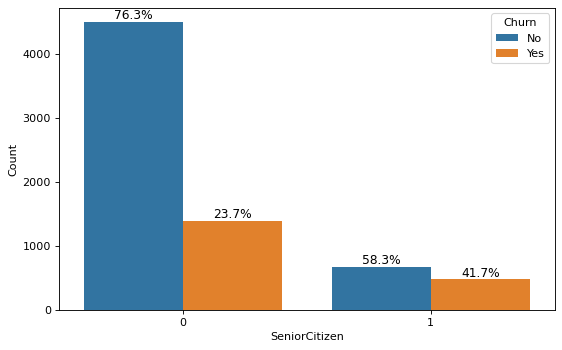

In [17]:
#let's see if SeniorCitizen affects Churn
plt.figure(figsize=(8,5), dpi=80)
citizen = sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
citizen.set(xlabel='SeniorCitizen', ylabel='Count')

bar_chart(citizen)
plt.show()

No     3639
Yes    3393
Name: Partner, dtype: int64


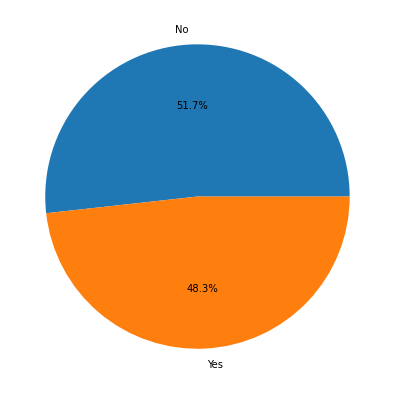

In [18]:
# let's take a look at Partner
fig = plt.figure(figsize =(10, 7))
label = df['Partner'].value_counts().keys()
plt.pie(df['Partner'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['Partner'].value_counts())
plt.show()

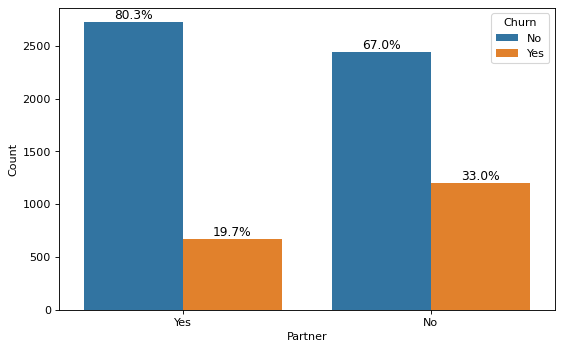

In [19]:
#let's see if Partner affects Churn
plt.figure(figsize=(8,5), dpi=80)
partner = sns.countplot(x="Partner", hue="Churn", data=df)
partner.set(xlabel='Partner', ylabel='Count')

bar_chart(partner)
plt.show()

No     4933
Yes    2099
Name: Dependents, dtype: int64


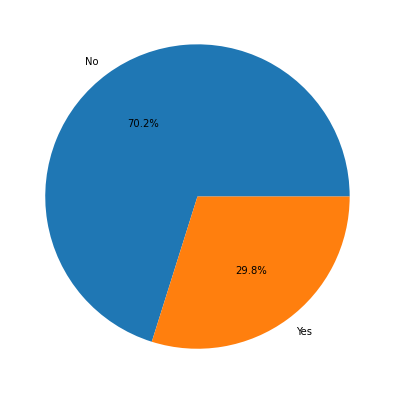

In [20]:
# let's take a look at Dependents
fig = plt.figure(figsize =(10, 7))
label = df['Dependents'].value_counts().keys()
plt.pie(df['Dependents'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['Dependents'].value_counts())
plt.show()

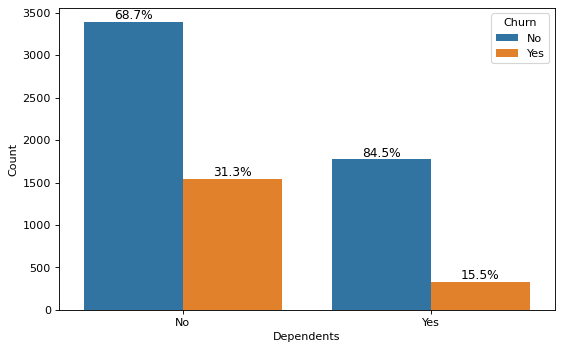

In [21]:
# let's see if Dependents affects Churn
plt.figure(figsize=(8,5), dpi=80)
dependents = sns.countplot(x="Dependents", hue="Churn", data=df)
dependents.set(xlabel='Dependents', ylabel='Count')

bar_chart(dependents)
plt.show()

Yes    6352
No      680
Name: PhoneService, dtype: int64


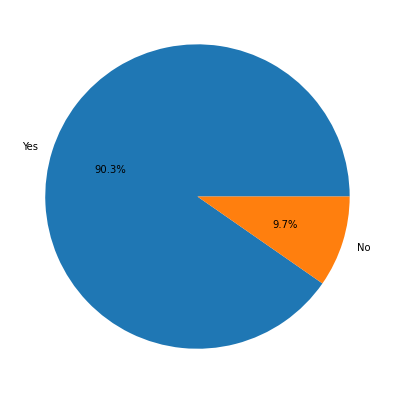

In [22]:
# let's take a look at Phone Service
fig = plt.figure(figsize =(10, 7))
label = df['PhoneService'].value_counts().keys()
plt.pie(df['PhoneService'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['PhoneService'].value_counts())
plt.show()

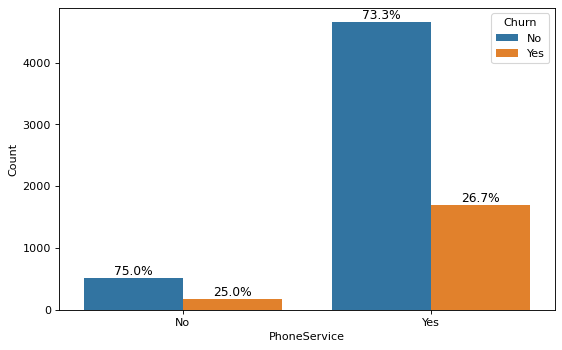

In [23]:
# let's see if Dependents affects Churn
plt.figure(figsize=(8,5), dpi=80)
Phone_service = sns.countplot(x="PhoneService", hue="Churn", data=df)
Phone_service.set(xlabel='PhoneService', ylabel='Count')

bar_chart(Phone_service)
plt.show()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


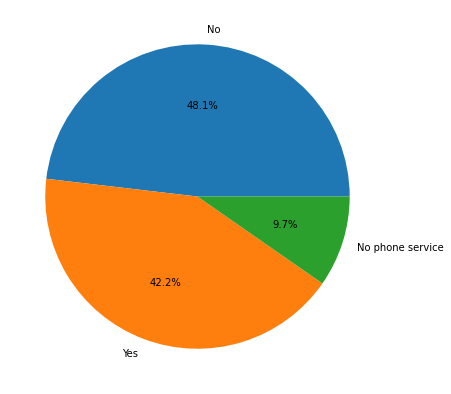

In [24]:
# let's take a look at Multiple lines
fig = plt.figure(figsize =(10, 7))
label = df['MultipleLines'].value_counts().keys()
plt.pie(df['MultipleLines'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['MultipleLines'].value_counts())
plt.show()

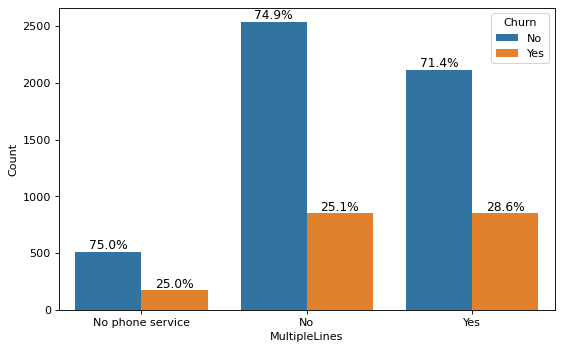

In [25]:
# let's see if Multiple Lines affects Churn
plt.figure(figsize=(8,5), dpi=80)
lines = sns.countplot(x="MultipleLines", hue="Churn", data=df)
lines.set(xlabel='MultipleLines', ylabel='Count')

bar_chart(lines)
plt.show()

Text(0.5, 1.0, 'MultipleLines Vs TotalCharges')

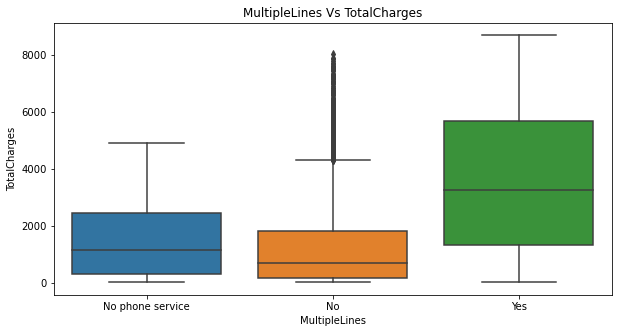

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['MultipleLines'],y=df['TotalCharges'])
plt.title('MultipleLines Vs TotalCharges')

Text(0.5, 1.0, 'MultipleLines Vs MonthlyCharges')

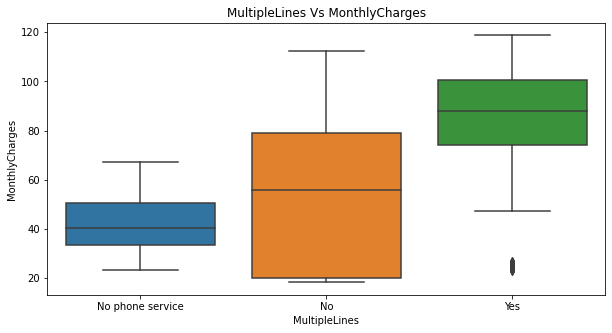

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['MultipleLines'],y=df['MonthlyCharges'])
plt.title('MultipleLines Vs MonthlyCharges')

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


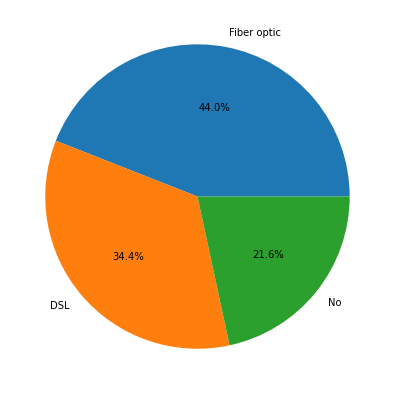

In [28]:
# let's take a look at Internet Service
fig = plt.figure(figsize =(10, 7))
label = df['InternetService'].value_counts().keys()
plt.pie(df['InternetService'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['InternetService'].value_counts())
plt.show()

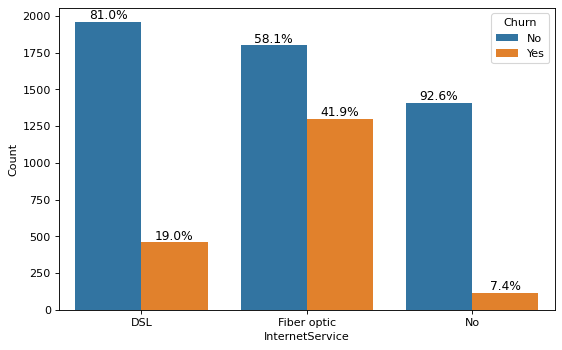

In [29]:
# let's see if Internet Service affects Churn
plt.figure(figsize=(8,5), dpi=80)
internet = sns.countplot(x="InternetService", hue="Churn", data=df)
internet.set(xlabel='InternetService', ylabel='Count')

bar_chart(internet)
plt.show()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


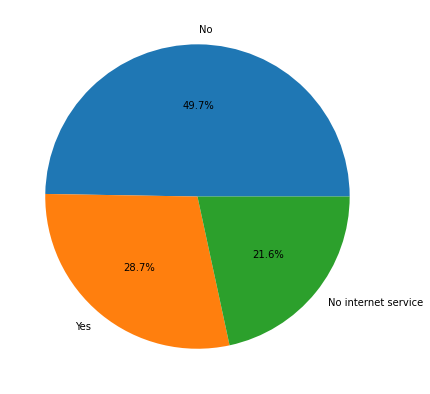

In [30]:
# let's take a look at OnlineSecurity
fig = plt.figure(figsize =(10, 7))
label = df['OnlineSecurity'].value_counts().keys()
plt.pie(df['OnlineSecurity'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['OnlineSecurity'].value_counts())
plt.show()

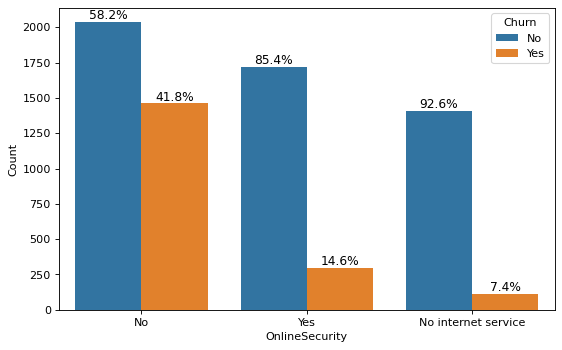

In [31]:
# let's see if OnlineSecurity affects Churn
plt.figure(figsize=(8,5), dpi=80)
security = sns.countplot(x="OnlineSecurity", hue="Churn", data=df)
security.set(xlabel='OnlineSecurity', ylabel='Count')

bar_chart(security)
plt.show()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


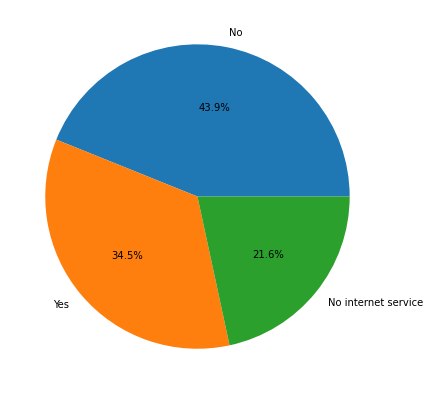

In [32]:
# let's take a look at OnlineBackup
fig = plt.figure(figsize =(10, 7))
label = df['OnlineBackup'].value_counts().keys()
plt.pie(df['OnlineBackup'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['OnlineBackup'].value_counts())
plt.show()

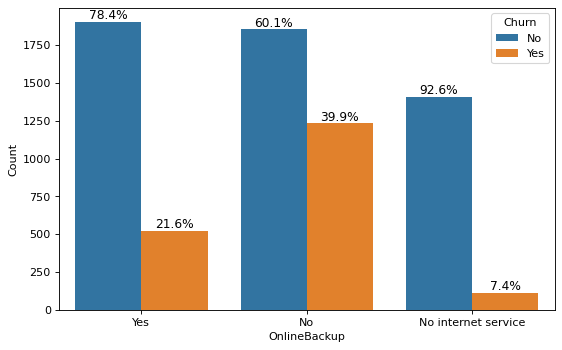

In [33]:
# let's see if OnlineBackup affects Churn
plt.figure(figsize=(8,5), dpi=80)
backup = sns.countplot(x="OnlineBackup", hue="Churn", data=df)
backup.set(xlabel='OnlineBackup', ylabel='Count')

bar_chart(backup)
plt.show()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


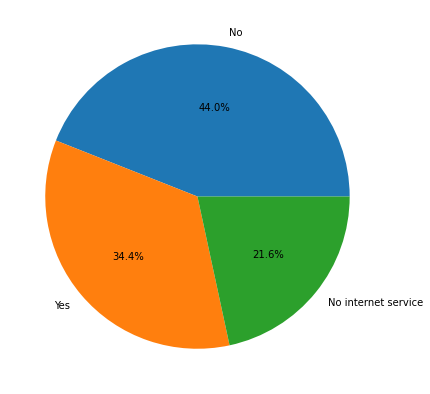

In [34]:
# let's take a look at DeviceProtection
fig = plt.figure(figsize =(10, 7))
label = df['DeviceProtection'].value_counts().keys()
plt.pie(df['DeviceProtection'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['DeviceProtection'].value_counts())
plt.show()

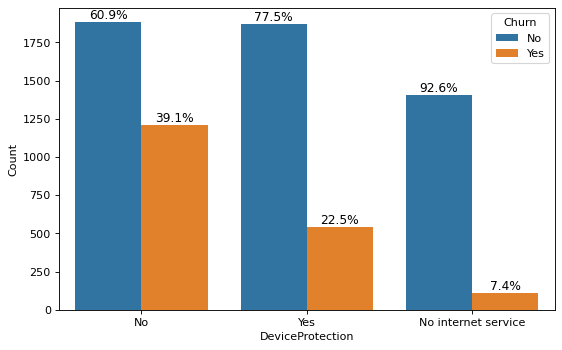

In [35]:
# let's see if DeviceProtection affects Churn
plt.figure(figsize=(8,5), dpi=80)
protection = sns.countplot(x="DeviceProtection", hue="Churn", data=df)
protection.set(xlabel='DeviceProtection', ylabel='Count')

bar_chart(protection)
plt.show()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


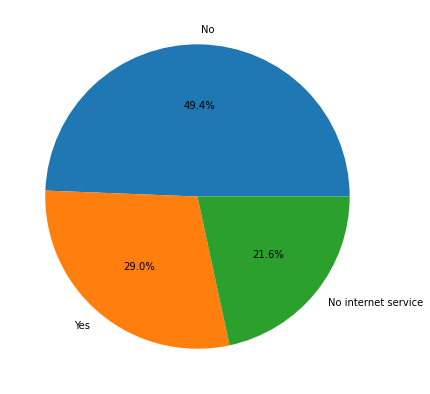

In [36]:
# let's take a look at TechSupport
fig = plt.figure(figsize =(10, 7))
label = df['TechSupport'].value_counts().keys()
plt.pie(df['TechSupport'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['TechSupport'].value_counts())
plt.show()

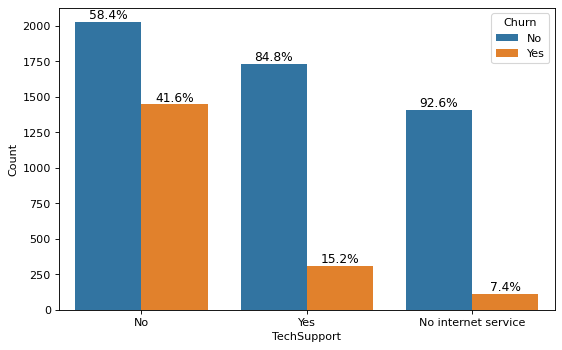

In [37]:
# let's see if TechSupport affects Churn
plt.figure(figsize=(8,5), dpi=80)
support = sns.countplot(x="TechSupport", hue="Churn", data=df)
support.set(xlabel='TechSupport', ylabel='Count')

bar_chart(support)
plt.show()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


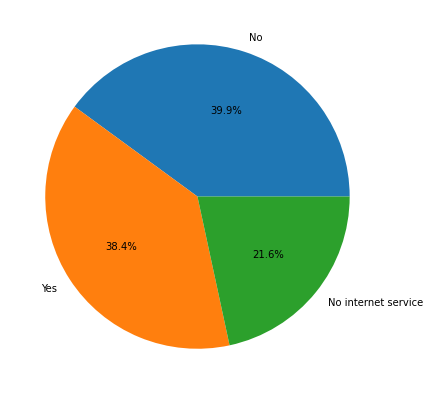

In [38]:
# let's take a look at StreamingTV
fig = plt.figure(figsize =(10, 7))
label = df['StreamingTV'].value_counts().keys()
plt.pie(df['StreamingTV'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['StreamingTV'].value_counts())
plt.show()

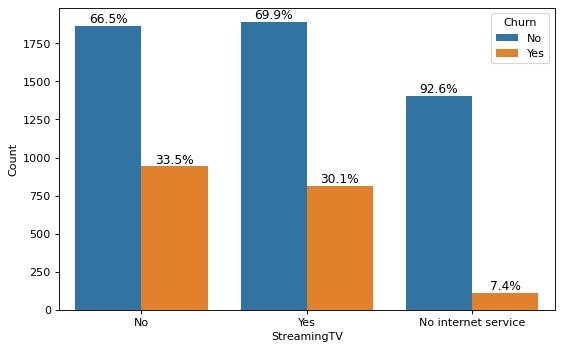

In [39]:
# let's see if StreamingTV affects Churn
plt.figure(figsize=(8,5), dpi=80)
stv = sns.countplot(x="StreamingTV", hue="Churn", data=df)
stv.set(xlabel='StreamingTV', ylabel='Count')

bar_chart(stv)
plt.show()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64


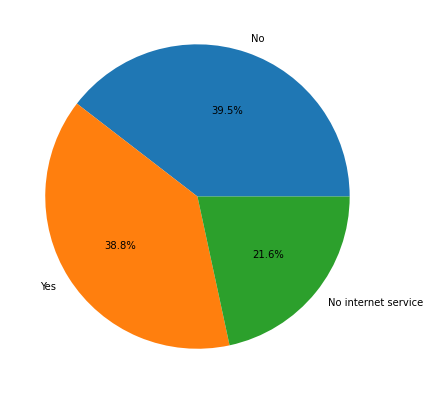

In [40]:
# let's take a look at StreamingMovies
fig = plt.figure(figsize =(10, 7))
label = df['StreamingMovies'].value_counts().keys()
plt.pie(df['StreamingMovies'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['StreamingMovies'].value_counts())
plt.show()

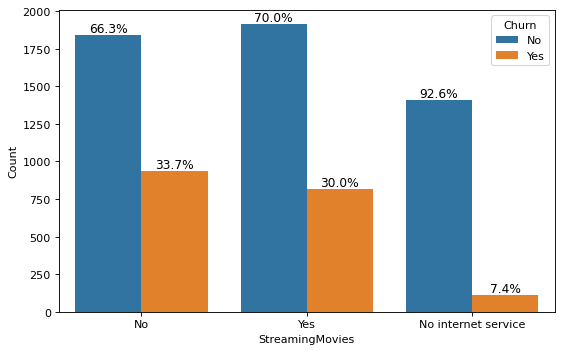

In [41]:
# let's see if StreamingMovies affects Churn
plt.figure(figsize=(8,5), dpi=80)
stm = sns.countplot(x="StreamingMovies", hue="Churn", data=df)
stm.set(xlabel='StreamingMovies', ylabel='Count')

bar_chart(stm)
plt.show()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


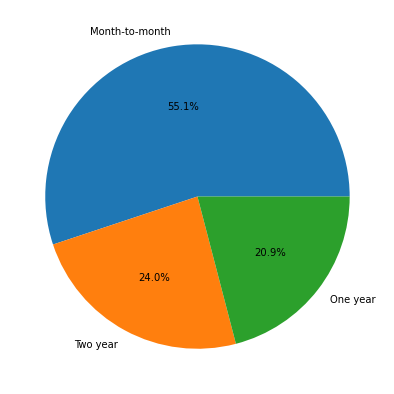

In [42]:
# let's take a look at Contract
fig = plt.figure(figsize =(10, 7))
label = df['Contract'].value_counts().keys()
plt.pie(df['Contract'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['Contract'].value_counts())
plt.show()

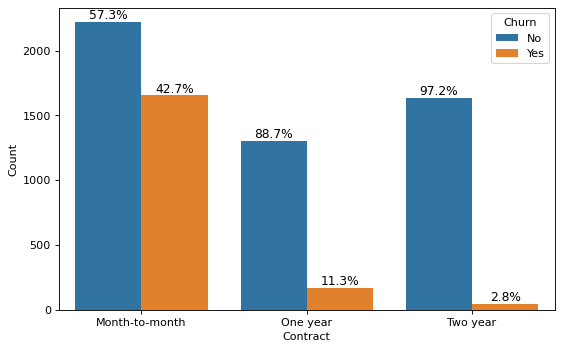

In [43]:
# let's see if Contract affects Churn
plt.figure(figsize=(8,5), dpi=80)
contract = sns.countplot(x="Contract", hue="Churn", data=df)
contract.set(xlabel='Contract', ylabel='Count')

bar_chart(contract)
plt.show()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


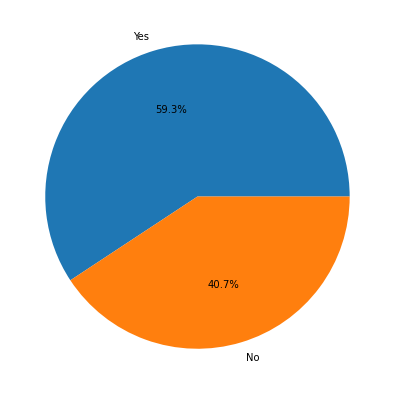

In [44]:
# let's take a look at PaperlessBilling
fig = plt.figure(figsize =(10, 7))
label = df['PaperlessBilling'].value_counts().keys()
plt.pie(df['PaperlessBilling'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['PaperlessBilling'].value_counts())
plt.show()

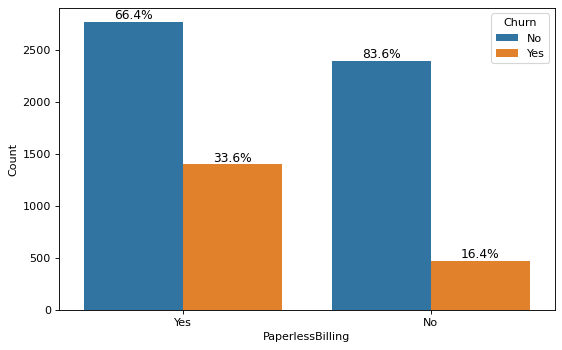

In [45]:
# let's see if PaperlessBilling affects Churn
plt.figure(figsize=(8,5), dpi=80)
billing = sns.countplot(x="PaperlessBilling", hue="Churn", data=df)
billing.set(xlabel='PaperlessBilling', ylabel='Count')

bar_chart(billing)
plt.show()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


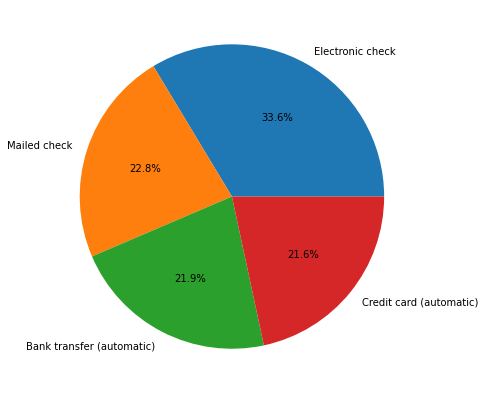

In [46]:
# let's take a look at PaymentMethod
fig = plt.figure(figsize =(10, 7))
label = df['PaymentMethod'].value_counts().keys()
plt.pie(df['PaymentMethod'].value_counts(), labels = label, autopct='%1.1f%%')
print(df['PaymentMethod'].value_counts())
plt.show()

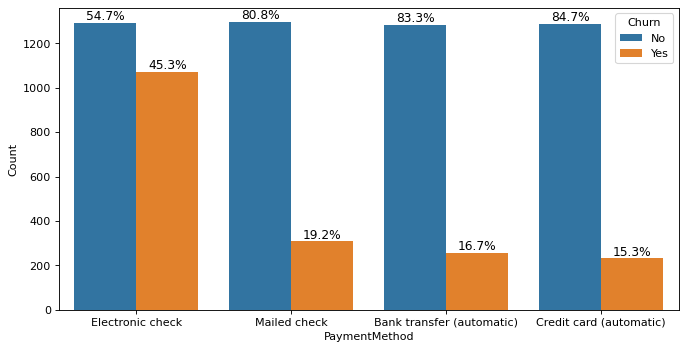

In [47]:
# let's see if PaymentMethod affects Churn
plt.figure(figsize=(10,5), dpi=80)
payment = sns.countplot(x="PaymentMethod", hue="Churn", data=df)
payment.set(xlabel='PaymentMethod', ylabel='Count')

bar_chart(payment)
plt.show()

### After having gain insights from our data, we would do some preprocessing to get our data ready for model training

In [48]:
# let's check for unique values in the dataset
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print('________________________________________________')

customerID: Number of unique values 7032
________________________________________________
gender: Number of unique values 2
________________________________________________
SeniorCitizen: Number of unique values 2
________________________________________________
Partner: Number of unique values 2
________________________________________________
Dependents: Number of unique values 2
________________________________________________
tenure: Number of unique values 72
________________________________________________
PhoneService: Number of unique values 2
________________________________________________
MultipleLines: Number of unique values 3
________________________________________________
InternetService: Number of unique values 3
________________________________________________
OnlineSecurity: Number of unique values 3
________________________________________________
OnlineBackup: Number of unique values 3
________________________________________________
DeviceProtection: Number of uni

In [49]:
# separating the categorical columns
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
categorical_col

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [50]:
# encoding the categorical columns
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [51]:
# Now we will split the data into testing and training sets
x = df.drop('Churn', axis=1)
y = df.Churn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [52]:
# Now we will scale the data to remove variances
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test= pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
x_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.418966,-1.003256,-0.440546,-0.971159,1.530190,-0.833469,0.327584,1.109818,0.164855,1.407006,-1.034764,-1.032700,-0.930410,-1.124565,-1.121377,-0.830368,0.825234,0.408174,0.444749,-0.607066
1,-1.087108,0.996755,-0.440546,-0.971159,-0.653514,-0.508058,0.327584,-0.998044,1.521741,0.243093,0.102091,0.104425,0.230127,0.006434,0.009651,0.363635,0.825234,1.347412,-1.492135,-0.823672
2,-1.139874,-1.003256,-0.440546,-0.971159,1.530190,-1.240233,0.327584,-0.998044,-1.192030,1.407006,-1.034764,-1.032700,-0.930410,-1.124565,1.140680,-0.830368,0.825234,-0.531065,-0.120451,-0.950975
3,-0.883931,-1.003256,2.269912,1.029697,-0.653514,0.061411,0.327584,-0.998044,-1.192030,-0.920820,-1.034764,1.241551,1.390663,1.137433,-1.121377,0.363635,-1.211778,-1.470303,-0.021293,-0.081500
4,-0.856807,-1.003256,-0.440546,-0.971159,-0.653514,-0.833469,0.327584,1.109818,0.164855,-0.920820,-1.034764,1.241551,-0.930410,1.137433,1.140680,-0.830368,0.825234,-1.470303,1.166949,-0.495086


In [53]:
# let's check for skewness
df.skew()

customerID          0.000000
gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

In [54]:
# lets use vif to check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]
  
print(vif_data)

             feature        VIF
0         customerID   1.004326
1             gender   1.004002
2      SeniorCitizen   1.148238
3            Partner   1.455083
4         Dependents   1.373757
5             tenure   7.392355
6       PhoneService   1.640614
7      MultipleLines   1.390748
8    InternetService   1.829731
9     OnlineSecurity   1.258147
10      OnlineBackup   1.202339
11  DeviceProtection   1.313971
12       TechSupport   1.300202
13       StreamingTV   1.440866
14   StreamingMovies   1.452832
15          Contract   2.481149
16  PaperlessBilling   1.199221
17     PaymentMethod   1.192242
18    MonthlyCharges   4.989452
19      TotalCharges  10.496399


### Now we will move ahead with model training

In [55]:
#Creating a function within many Machine Learning Models
def models(x_train,y_train):
  
    #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(x_train, y_train)

    #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(x_train,y_train)

    #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(x_train, y_train)

    #Using SVC method of svm class to use Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(x_train, y_train)

    #Using XGBoost Algorithm
    from sklearn.ensemble import AdaBoostClassifier
    ada = AdaBoostClassifier()
    ada.fit(x_train, y_train)

    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(x_train, y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(x_train, y_train)

    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Ada Boost Training Accuracy:', ada.score(x_train, y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log, knn, svc_lin, svc_rbf, ada, tree, forest

In [56]:
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8041446566436408
[1]K Nearest Neighbor Training Accuracy: 0.8321820398212109
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7998780983340106
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8301503453880537
[4]Ada Boost Training Accuracy: 0.8108492482730597
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.983746444534742


In [57]:
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()

[[1376  173]
 [ 248  313]]
Model[0] Testing Accuracy = "0.8004739336492891 !"

[[1282  267]
 [ 262  299]]
Model[1] Testing Accuracy = "0.7492890995260664 !"

[[1380  169]
 [ 262  299]]
Model[2] Testing Accuracy = "0.795734597156398 !"

[[1388  161]
 [ 291  270]]
Model[3] Testing Accuracy = "0.785781990521327 !"

[[1361  188]
 [ 264  297]]
Model[4] Testing Accuracy = "0.785781990521327 !"

[[1237  312]
 [ 275  286]]
Model[5] Testing Accuracy = "0.7218009478672985 !"

[[1413  136]
 [ 307  254]]
Model[6] Testing Accuracy = "0.7900473933649289 !"



In [59]:
# Regularization Random Forest Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'criterion':['gini', 'entropy', 'log_loss'],
             'n_estimators':list(range(10,100)),
             'max_features':['sqrt', 'log2']}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 69}


In [60]:
rf = RandomForestClassifier(criterion='entropy',max_features='sqrt', n_estimators=69)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_dec = rf.predict(x_test)

rfs = accuracy_score(y_test, pred_dec)
print(rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print(rfc*100)

78.24644549763033
79.1950833113441


In [61]:
# Regularization Logistic Regression
from sklearn.linear_model import LogisticRegression
parameters = {'fit_intercept':[True,False],
             'intercept_scaling':list(range(1,10)),
             'penalty':['l1', 'l2', 'elasticnet', 'none']}
lr = LogisticRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'intercept_scaling': 1, 'penalty': 'none'}


In [68]:
lr = LogisticRegression(fit_intercept=1, intercept_scaling=1)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_dec = lr.predict(x_test)

lrs = accuracy_score(y_test, pred_dec)
print(lrs*100)

lrscore = cross_val_score(lr,x,y,cv=5)
lrc = lrscore.mean()
print(lrc*100)

80.04739336492891
79.74961607326101


In [69]:
# Regularization Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
parameters = {'learning_rate':[0.001,0.01,0.1,1.0,10],
             'n_estimators':[0.001,0.01, 0.1,1.0,10],
             'random_state':list(range(1,100))}
ab = AdaBoostClassifier()
clf = GridSearchCV(ab,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 1.0, 'n_estimators': 10, 'random_state': 1}


In [70]:
ab = AdaBoostClassifier(learning_rate=1.0,random_state=1,n_estimators=10)
ab.fit(x_train,y_train)
ab.score(x_train,y_train)
pred_dec = ab.predict(x_test)

absc = accuracy_score(y_test, pred_dec)
print(absc*100)

abscore = cross_val_score(ab,x,y,cv=5)
abc = abscore.mean()
print(abc*100)

77.6303317535545
79.25207330549043


In [71]:
# Regularization Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
parameters = {'splitter':['best', 'random'],
             'min_samples_split':list(range(1,10)),
             'criterion':['gini', 'entropy', 'log_loss']}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'min_samples_split': 9, 'splitter': 'random'}


In [72]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=9, splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dec = dt.predict(x_test)

dtsc = accuracy_score(y_test, pred_dec)
print(dtsc*100)

dtscore = cross_val_score(dt,x,y,cv=5)
dtc = dtscore.mean()
print(dtc*100)

74.31279620853081
74.900482347458


In [73]:
# Regularization Support Vector Machine
from sklearn.svm import SVC

parameters = {'random_state': list(range(1,100)),
             'kernel':['poly', 'rbf', 'sigmoid'],
             'gamma':['scale', 'auto']}
svc = SVC()
clf = GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'gamma': 'auto', 'kernel': 'rbf', 'random_state': 1}


In [74]:
svc = SVC(gamma='auto', kernel='rbf', random_state=1)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_dec = svc.predict(x_test)

svsc = accuracy_score(y_test, pred_dec)
print(svsc*100)

svscore = cross_val_score(svc,x,y,cv=5)
svs = svscore.mean()
print(svs*100)

78.5781990521327
73.3788383827661


In [75]:
# Regularization K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
parameters = {'weights':['uniform', 'distance'],
             'n_neighbors':list(range(1,10)),
             'algorithm':['auto', 'ball_tree', 'kd_tree','brute']}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}


In [76]:
knn = KNeighborsClassifier(algorithm='auto',n_neighbors=9, weights='uniform')
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_dec = dt.predict(x_test)

knnc = accuracy_score(y_test, pred_dec)
print(knnc*100)

knnscore = cross_val_score(knn,x,y,cv=5)
knc = knnscore.mean()
print(knc*100)

74.31279620853081
73.43564639715464


In [77]:
# saving the best model
import pickle
pickle.dump(dt, open('churn.pkl','wb'))